In [1]:
import pandas as pd

# Load dataset
df = pd.read_csv("Food_Production.csv")

# --- Step 1: Clean column names ---
df.columns = (
    df.columns
    .str.strip()
    .str.replace(" ", "_")
    .str.replace(r"[()]", "", regex=True)
    .str.replace("Â", "", regex=True)  # encoding artifacts
    .str.replace("â‚„", "PO4", regex=True)  # fix phosphate encoding
    .str.replace("â‚‚", "CO2", regex=True)  # fix CO2 encoding
)

# --- Step 2: Standardize food product names ---
df["Food_product"] = df["Food_product"].str.strip()

# Correct typo: rename 'packging' → 'packaging'
df = df.rename(columns={"Packging": "Packaging"})



🔹 Dataset Shape: (43, 23)

🔹 Columns: ['Food_product', 'Land_use_change', 'Animal_Feed', 'Farm', 'Processing', 'Transport', 'Packaging', 'Retail', 'Total_emissions', 'Eutrophying_emissions_per_1000kcal_gPO₄eq_per_1000kcal', 'Eutrophying_emissions_per_kilogram_gPO₄eq_per_kilogram', 'Eutrophying_emissions_per_100g_protein_gPO₄eq_per_100_grams_protein', 'Freshwater_withdrawals_per_1000kcal_liters_per_1000kcal', 'Freshwater_withdrawals_per_100g_protein_liters_per_100g_protein', 'Freshwater_withdrawals_per_kilogram_liters_per_kilogram', 'Greenhouse_gas_emissions_per_1000kcal_kgCO₂eq_per_1000kcal', 'Greenhouse_gas_emissions_per_100g_protein_kgCO₂eq_per_100g_protein', 'Land_use_per_1000kcal_m²_per_1000kcal', 'Land_use_per_kilogram_m²_per_kilogram', 'Land_use_per_100g_protein_m²_per_100g_protein', 'Scarcity-weighted_water_use_per_kilogram_liters_per_kilogram', 'Scarcity-weighted_water_use_per_100g_protein_liters_per_100g_protein', 'Scarcity-weighted_water_use_per_1000kcal_liters_per_1000_kiloc

C:\Users\User\AppData\Local\Temp\ipykernel_7360\3540979229.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Total_emissions", y="Food_product", data=top10_emissions, palette="viridis")


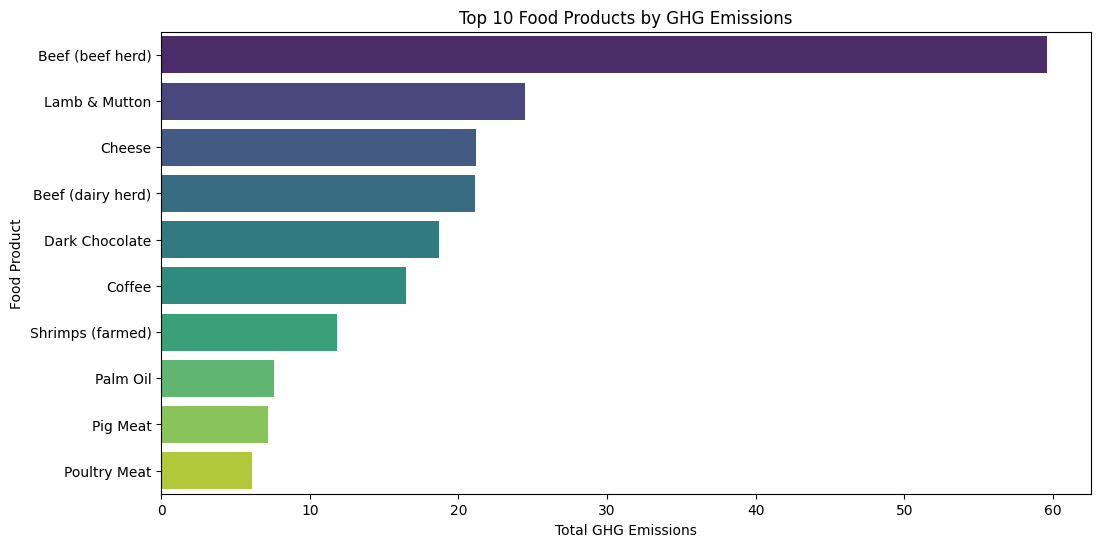

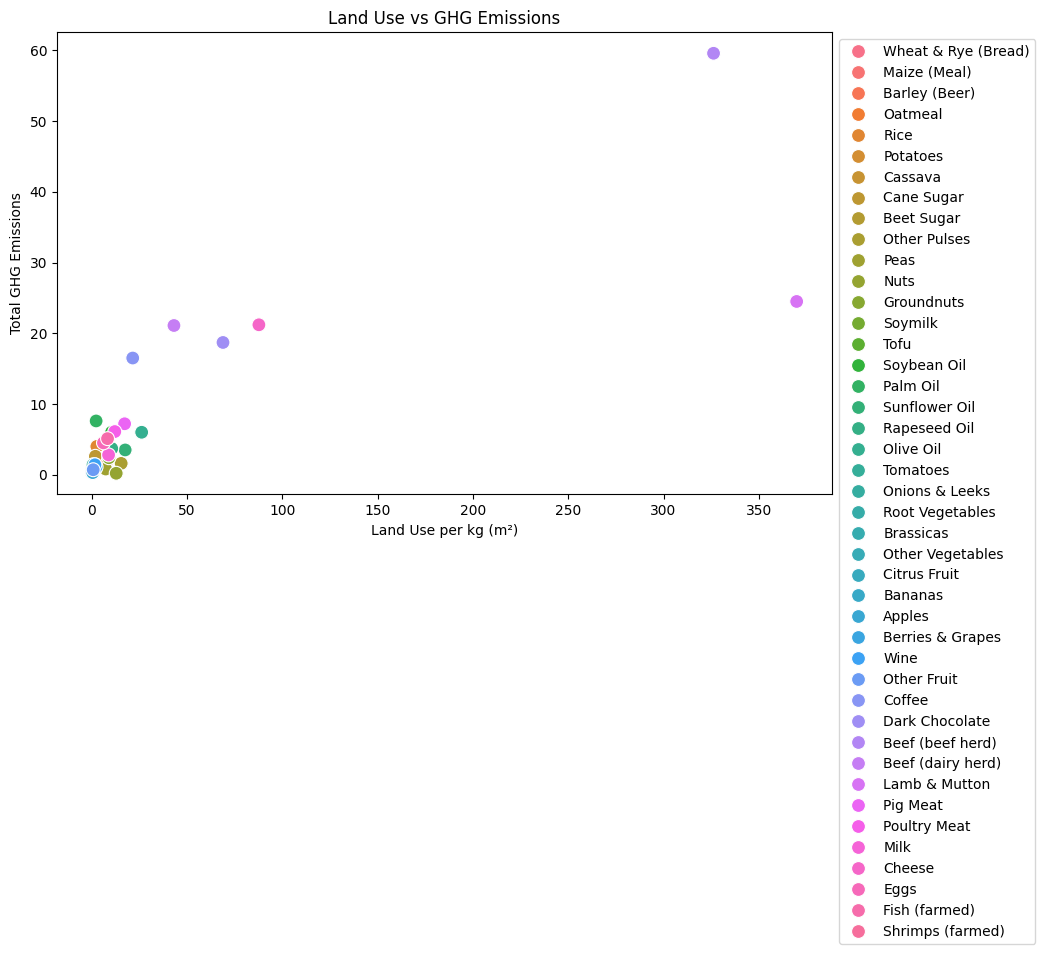

C:\Users\User\AppData\Local\Temp\ipykernel_7360\3540979229.py:63: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stage_means.values, y=stage_means.index, palette="mako")


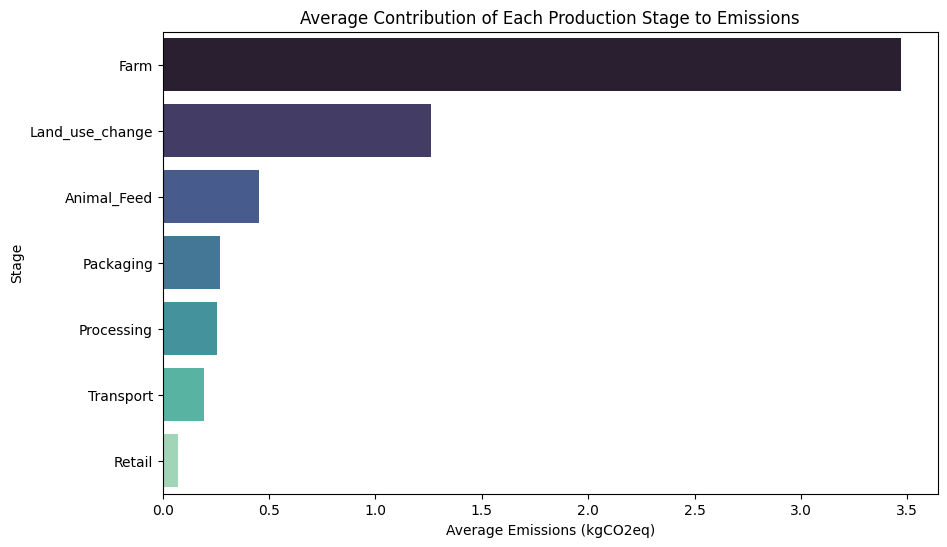

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ======================
# Data Quality Checks
# ======================

print("🔹 Dataset Shape:", df.shape)
print("\n🔹 Columns:", df.columns.tolist())


# Check duplicates
duplicates = df.duplicated().sum()
print(f"\n🔹 Number of duplicate rows: {duplicates}")

# Drop duplicates if needed
# df = df.drop_duplicates()

# Check data types
print("\n🔹 Data Types:\n", df.dtypes)

# Quick summary
print("\n🔹 Summary Statistics:\n", df.describe(include="all"))

# ======================
# Univariate Analysis
# ======================



# Top 10 food products by total emissions
top10_emissions = df.nlargest(10, "Total_emissions")
plt.figure(figsize=(12, 6))
sns.barplot(x="Total_emissions", y="Food_product", data=top10_emissions, palette="viridis")
plt.title("Top 10 Food Products by GHG Emissions")
plt.xlabel("Total GHG Emissions")
plt.ylabel("Food Product")
plt.show()

# ======================
# Bivariate Analysis
# ======================

# Scatter: Land use vs. GHG emissions
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Land_use_per_kilogram_m²_per_kilogram", y="Total_emissions", data=df, hue="Food_product", s=100)
plt.title("Land Use vs GHG Emissions")
plt.xlabel("Land Use per kg (m²)")
plt.ylabel("Total GHG Emissions")
plt.legend(bbox_to_anchor=(1, 1), loc="upper left")
plt.show()


# ======================
# Stage Contribution
# ======================
stage_cols = ["Land_use_change","Animal_Feed","Farm","Processing","Transport","Packaging","Retail"]

stage_means = df[stage_cols].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=stage_means.values, y=stage_means.index, palette="mako")
plt.title("Average Contribution of Each Production Stage to Emissions")
plt.xlabel("Average Emissions (kgCO2eq)")
plt.ylabel("Stage")
plt.show()


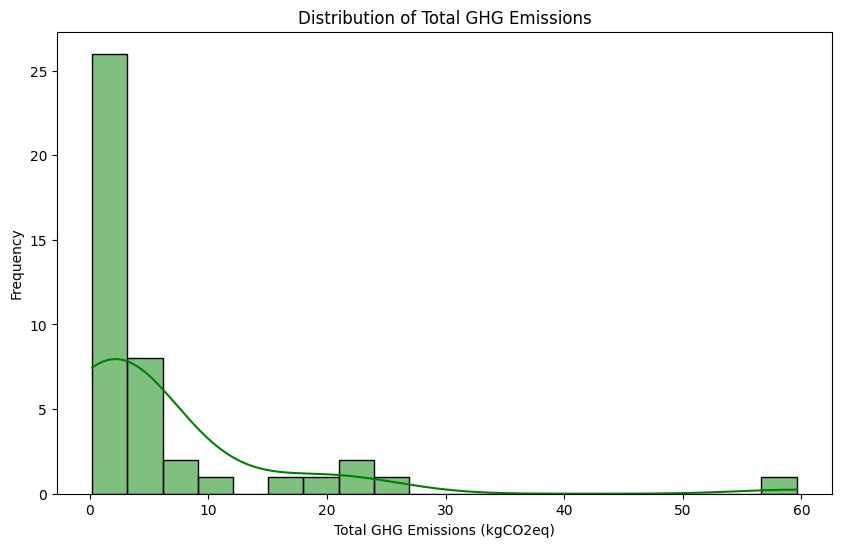

In [3]:
# Distribution of total GHG emissions
plt.figure(figsize=(10, 6))
sns.histplot(df["Total_emissions"], bins=20, kde=True, color="green")
plt.title("Distribution of Total GHG Emissions")
plt.xlabel("Total GHG Emissions (kgCO2eq)")
plt.ylabel("Frequency")
plt.show()

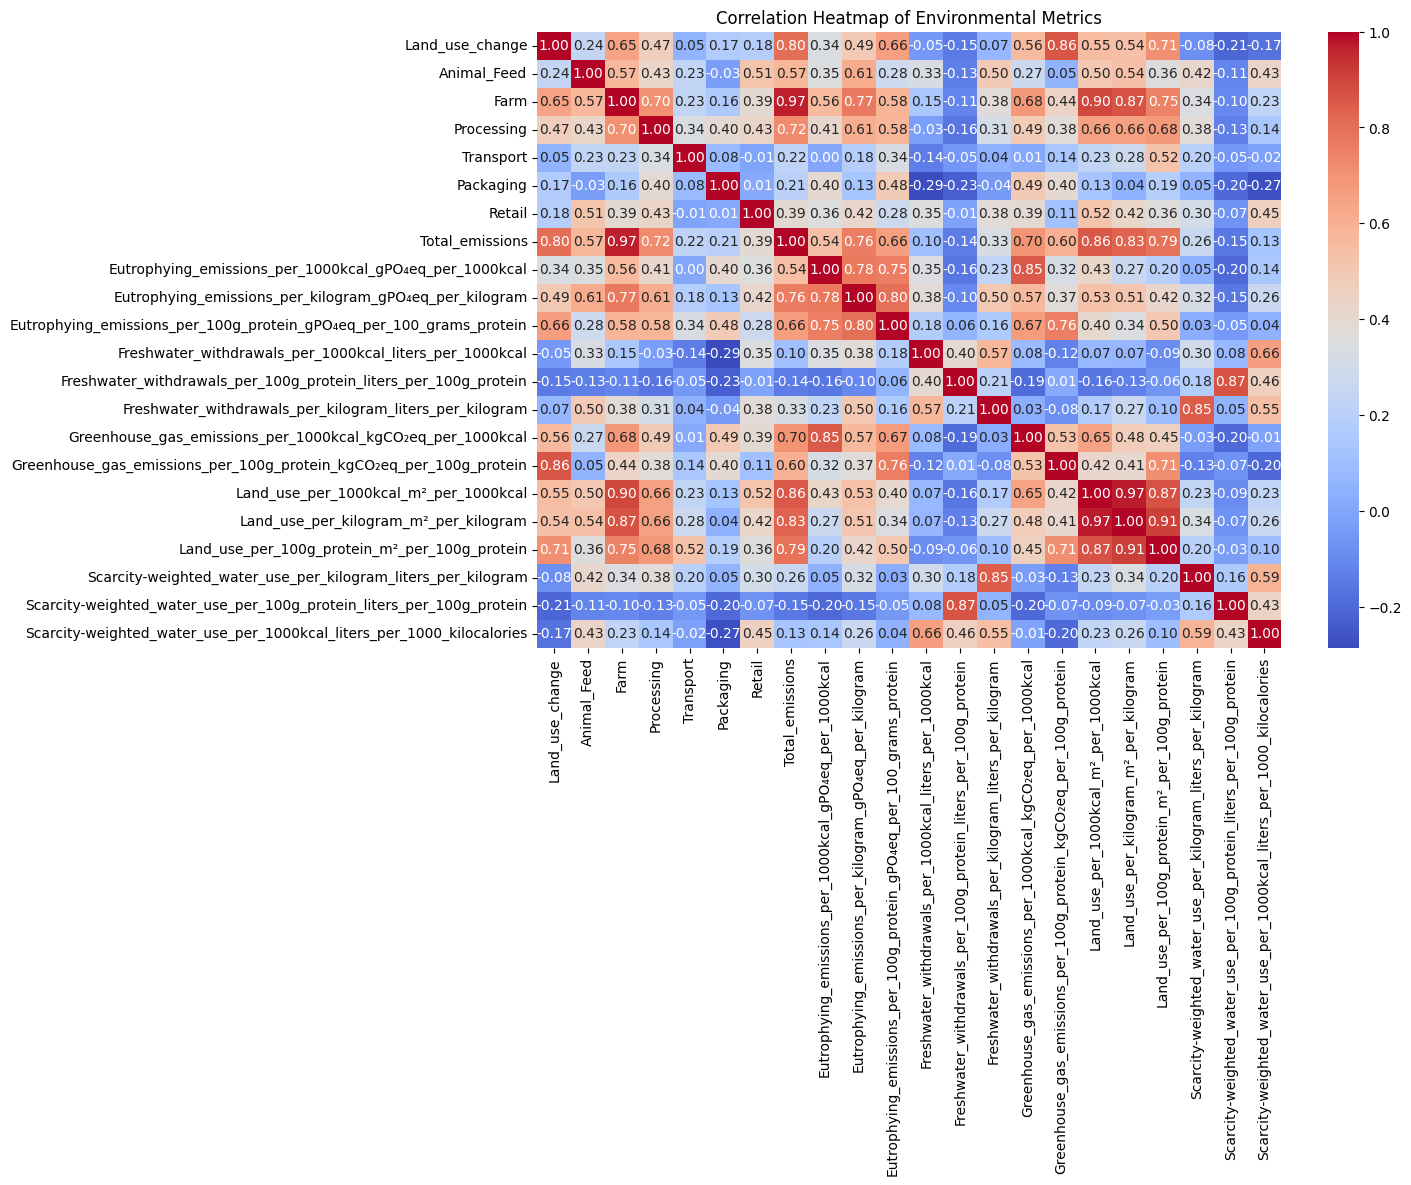

In [4]:
# Correlation Heatmap
plt.figure(figsize=(12, 8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Environmental Metrics")
plt.show()


In [5]:
# Check null values
print("\n🔹 Missing Values:\n", df.isnull().sum())

# Percentage of missing values
print("\n🔹 Missing Values (%):\n", (df.isnull().mean() * 100).round(2))


🔹 Missing Values:
 Food_product                                                              0
Land_use_change                                                           0
Animal_Feed                                                               0
Farm                                                                      0
Processing                                                                0
Transport                                                                 0
Packaging                                                                 0
Retail                                                                    0
Total_emissions                                                           0
Eutrophying_emissions_per_1000kcal_gPO₄eq_per_1000kcal                   10
Eutrophying_emissions_per_kilogram_gPO₄eq_per_kilogram                    5
Eutrophying_emissions_per_100g_protein_gPO₄eq_per_100_grams_protein      16
Freshwater_withdrawals_per_1000kcal_liters_per_1000kcal             

In [12]:
# --- Step 3: Handle missing values ---
df = df.fillna(0)

# --- Step 4: Ensure numeric types ---
for col in df.columns:
    if col != "Food_product":
        df[col] = pd.to_numeric(df[col], errors="coerce").fillna(0)

# --- Step 5: Add food category (simple mapping) ---
animal_foods = [
    "Beef", "Lamb", "Cheese", "Milk", "Eggs", "Chicken", "Fish", "Pork", "Butter"
]
df["Food_Category"] = df["Food_product"].apply(
    lambda x: "Animal-based" if any(a in x for a in animal_foods) else "Plant-based"
)

# --- Step 6: Export cleaned dataset ---
df.to_csv("Food_Production_Clean.csv", index=False)

print("✅ Cleaning complete. File saved as Food_Production_Clean.csv")


✅ Cleaning complete. File saved as Food_Production_Clean.csv
